<a href="https://colab.research.google.com/github/valleandreaa/LLM-Cleantech-Insights/blob/main/Project_Phase_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Collection and Cleaning

In this section we will perform tasks to clean the data, where we remove special characters, numbers, punctuation and etc and convert the text into lowcase letters.  

In [ ]:
#libraries
import os
import pandas as pd
import re
import string

In [ ]:
path = "/content/drive/MyDrive/NLP/cleantech.csv"

In [ ]:
df = pd.read_csv(path)
df.head(3)

,Unnamed: 0,title,date,author,content,domain,crawled_time,url,filter_keywords,domain_weight,...,headline_esg_topics,is_opinion,esg_focus,article_type,industry,keywords,bookmarks,by_company,_created_at,comments
0,1280,Qatar to Slash Emissions as LNG Expansion Adva...,2021-01-13,NaN,"[""Qatar Petroleum ( QP) is targeting aggressiv...",energyintel,2022-05-24,https://www.energyintel.com/0000017b-a7dc-de4c...,['solar energy'],5,...,[],False,False,other,other,[],[],NaN,2023-07-04T13:50:02.199227,NaN
1,1281,India Launches Its First 700 MW PHWR,2021-01-15,NaN,"[""• Nuclear Power Corp. of India Ltd. ( NPCIL)...",energyintel,2022-08-16,https://www.energyintel.com/0000017b-a7dc-de4c...,['energy generation'],5,...,[],False,False,other,other,[],[],NaN,2023-07-04T13:50:02.217581,NaN
2,1282,Abu Dhabi Eyes H2 Lead,2021-01-19,NaN,"[""Abu Dhabi is pushing to become a global supp...",energyintel,2022-07-01,https://www.energyintel.com/0000017b-a7dc-de4c...,['plan a'],5,...,[],False,False,other,other,[],[],NaN,2023-07-04T13:50:02.232694,NaN


In [ ]:
#removal of numbers

def remove_digits(item):
    if isinstance(item, str):
        return ''.join(i for i in item if not i.isdigit())
    else:
        return str(item)


columns_to_process = ['title', 'author', 'content', 'domain', 'filter_keywords', 'tags', 'companies', 'locations', 'esg_topics', 'sdgs', 'concept_string', 'headline_companies', 'headline_locations', 'headline_esg_topics', 'keywords', 'bookmarks']

df_no_numbers = df.assign(**{col: df[col].apply(remove_digits) for col in columns_to_process})

df_no_numbers.head(3)

,Unnamed: 0,title,date,author,content,domain,crawled_time,url,filter_keywords,domain_weight,...,headline_esg_topics,is_opinion,esg_focus,article_type,industry,keywords,bookmarks,by_company,_created_at,comments
0,1280,Qatar to Slash Emissions as LNG Expansion Adva...,2021-01-13,nan,"[""Qatar Petroleum ( QP) is targeting aggressiv...",energyintel,2022-05-24,https://www.energyintel.com/0000017b-a7dc-de4c...,['solar energy'],5,...,[],False,False,other,other,[],[],NaN,2023-07-04T13:50:02.199227,NaN
1,1281,India Launches Its First MW PHWR,2021-01-15,nan,"[""• Nuclear Power Corp. of India Ltd. ( NPCIL)...",energyintel,2022-08-16,https://www.energyintel.com/0000017b-a7dc-de4c...,['energy generation'],5,...,[],False,False,other,other,[],[],NaN,2023-07-04T13:50:02.217581,NaN
2,1282,Abu Dhabi Eyes H Lead,2021-01-19,nan,"[""Abu Dhabi is pushing to become a global supp...",energyintel,2022-07-01,https://www.energyintel.com/0000017b-a7dc-de4c...,['plan a'],5,...,[],False,False,other,other,[],[],NaN,2023-07-04T13:50:02.232694,NaN


In [ ]:
# Substitution of certain characters into wording

def substitution_of_characters(char):
    if isinstance(char, str):
      return char.replace('$', 'dollar').replace('€', 'euro')
    else:
      return str(char)

columns_to_process = ['title', 'author', 'content', 'domain', 'filter_keywords', 'tags', 'companies', 'locations', 'esg_topics', 'sdgs', 'concept_string', 'headline_companies', 'headline_locations', 'headline_esg_topics', 'keywords', 'bookmarks']
df_new_char = df_no_numbers.assign(**{col: df_no_numbers[col].apply(substitution_of_characters) for col in columns_to_process})


In [ ]:
def eliminate_standalone_s(char):
    if isinstance(char, str):
      return re.sub(r'\bs\b', '', char)
    else:
      return str(char)

columns_to_process = ['title', 'content', 'domain', 'filter_keywords', 'tags', 'companies', 'locations', 'esg_topics', 'sdgs', 'concept_string', 'headline_companies', 'headline_locations', 'headline_esg_topics',]

df_no_space = df_new_char.assign(**{col: df_new_char[col].apply(eliminate_standalone_s) for col in columns_to_process})


In [ ]:
# Remove punctuations
punctuation = string.punctuation + "“”‘’'\"„‚«»「」『』【】〝〞〟〟〟〟〟"

def remove_of_punctuation(item):
  if isinstance(item, str):
    #quotation marks must be added as punctuation characters to remove
    punctuation = string.punctuation + "“”‘’'\""
    translator = str.maketrans('', '', punctuation)
    return ' '.join(word.translate(translator) for word in item.split())
  else:
    return str(item)

columns_to_process = ['title', 'author', 'content', 'domain', 'filter_keywords','locations', 'esg_topics']
df_no_punctuation = df_no_space.assign(**{col: df_no_space[col].apply(remove_of_punctuation) for col in columns_to_process})

df_no_punctuation.head(2)

,Unnamed: 0,title,date,author,content,domain,crawled_time,url,filter_keywords,domain_weight,...,headline_esg_topics,is_opinion,esg_focus,article_type,industry,keywords,bookmarks,by_company,_created_at,comments
0,1280,Qatar to Slash Emissions as LNG Expansion Adva...,2021-01-13,nan,Qatar Petroleum QP is targeting aggressive cu...,energyintel,2022-05-24,https://www.energyintel.com/0000017b-a7dc-de4c...,solar energy,5,...,[],False,False,other,other,[],[],NaN,2023-07-04T13:50:02.199227,NaN
1,1281,India Launches Its First MW PHWR,2021-01-15,nan,• Nuclear Power Corp of India Ltd NPCIL synch...,energyintel,2022-08-16,https://www.energyintel.com/0000017b-a7dc-de4c...,energy generation,5,...,[],False,False,other,other,[],[],NaN,2023-07-04T13:50:02.217581,NaN


Removing not essential punctuation

In [ ]:
# Remove punctuations
punctuation =  "“”‘’'\"„‚«»「」『』【】〝〞〟〟〟〟〟•"

def remove_of_punctuation(item):
  if isinstance(item, str):
    #quotation marks must be added as punctuation characters to remove
    punctuation = "“”‘’'\""
    translator = str.maketrans('', '', punctuation)
    return ' '.join(word.translate(translator) for word in item.split())
  else:
    return str(item)

def lowercase_sentences(text):
    return text.lower()

def split_sentences(text):
    sentence_endings = r'[.!?]'
    sentences = re.split(sentence_endings, text)
    # Remove punctuation after splitting into sentences
    sentences = [''.join(c for c in sentence if c not in string.punctuation) for sentence in sentences]
    sentences = [re.sub(r'[•]', '', sentence).strip() for sentence in sentences if sentence.strip()]
# Filter out empty strings
    sentences = [re.sub(r'\s+', ' ', sentence).strip() for sentence in sentences if re.sub(r'\s+', ' ', sentence).strip()]
    return sentences

columns_to_process = ['title', 'author', 'content', 'domain', 'filter_keywords','locations', 'esg_topics']
df_essential_punctuation = df_no_space.assign(**{col: df_no_space[col].apply(remove_of_punctuation) for col in columns_to_process})

# Lowercase content
df_essential_punctuation['content'] = df_essential_punctuation['content'].apply(lowercase_sentences)

# Split content into sentences and remove punctuation
df_essential_punctuation['content'] = df_essential_punctuation['content'].apply(split_sentences)


# Removal of bullet points or special characters on the content column
def remove_special_characters(char):
    if isinstance(char, str):
      characters_to_remove = '•'
      return char.translate(str.maketrans('', '', characters_to_remove)).strip()
    else:
        return char

df_essential_punctuation = df_essential_punctuation.assign(content = df_essential_punctuation['content'].apply(remove_special_characters))


df_essential_punctuation.head(2)

,Unnamed: 0,title,date,author,content,domain,crawled_time,url,filter_keywords,domain_weight,...,headline_esg_topics,is_opinion,esg_focus,article_type,industry,keywords,bookmarks,by_company,_created_at,comments
0,1280,Qatar to Slash Emissions as LNG Expansion Adva...,2021-01-13,nan,[qatar petroleum qp is targeting aggressive cu...,energyintel,2022-05-24,https://www.energyintel.com/0000017b-a7dc-de4c...,[solar energy],5,...,[],False,False,other,other,[],[],NaN,2023-07-04T13:50:02.199227,NaN
1,1281,India Launches Its First MW PHWR,2021-01-15,nan,"[nuclear power corp, of india ltd, npcil synch...",energyintel,2022-08-16,https://www.energyintel.com/0000017b-a7dc-de4c...,[energy generation],5,...,[],False,False,other,other,[],[],NaN,2023-07-04T13:50:02.217581,NaN


In [ ]:
df_essential_punctuation['esg_topics']

0       [SolarEnergy, GHGEmission, Methane, ESGDisclos...
1       [LowCarbon, NuclearPower, WindEnergy, Renewabl...
2            [LowCarbon, RenewableEnergy, HydrogenEnergy]
3       [Sanction, ClimateChange, FossilFuels, Petrole...
4                        [NuclearPower, CounterTerrorism]
                              ...                        
6573                          [Privacy, EnergyManagement]
6574             [Privacy, Environment, EnergyManagement]
6575    [WindEnergy, EnergyManagement, LowCarbon, Rene...
6576    [Compliance, HydrogenEnergy, ValueChain, Photo...
6577                                [WindEnergy, Privacy]
Name: esg_topics, Length: 6578, dtype: object

In [ ]:
# Removal of bullet points or special characters on the content column
def remove_special_characters(char):
    if isinstance(char, str):
      characters_to_remove = '•'
      return char.translate(str.maketrans('', '', characters_to_remove)).strip()
    else:
        return char

df_no_char = df_no_punctuation.assign(content = df_no_punctuation['content'].apply(remove_special_characters))

In [ ]:
# convert all letters into lower case

def convert_to_lowercase(item):
  if isinstance(item, list):
    return [subitem.lower() if isinstance(subitem, str) else subitem for subitem in item]
  elif isinstance(item, str):
    return item.lower()
  else:
    return item

df_lowercase = df_no_char.applymap(convert_to_lowercase)

In [ ]:
#removing trailing whitespaces
def remove_trailing_whitespaces_inplace(item):
    if isinstance(item, str):
        return ' '.join(token.strip() for token in str(item).split())
    else:
        return str(item)

# Assuming df_lowercase is your DataFrame and columns_to_process is the list of columns
columns_to_process = ['title', 'author', 'content', 'domain', 'filter_keywords', 'locations', 'esg_topics']

# Apply the function to remove trailing whitespaces to each specified column in the DataFrame
for col in columns_to_process:
    df_lowercase[col] = df_lowercase[col].apply(remove_trailing_whitespaces_inplace)

In [ ]:
df_cleantech  = df_lowercase[["title", "content",  'esg_topics', 'sentiment_label', 'sentiment', 'n_tokens']]

In [ ]:
#convert columns into strings
columns_to_convert = ['content', 'title', 'esg_topics']
df_cleantech[columns_to_convert] = df_cleantech[columns_to_convert].astype('string')

print(df_cleantech.dtypes)

title               string
content             string
esg_topics          string
sentiment_label     object
sentiment          float64
n_tokens           float64
dtype: object


<ipython-input-16-63eac78759f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleantech[columns_to_convert] = df_cleantech[columns_to_convert].astype('string')


In [ ]:
df_essential_punctuation['title'] = df_cleantech['title']
df_essential_punctuation['esg_topics'] = df_cleantech['esg_topics']
df_essential_punctuation['sentiment_label'] = df_cleantech['sentiment_label']
df_essential_punctuation['sentiment'] = df_cleantech['sentiment']
df_essential_punctuation['n_tokens'] = df_cleantech['n_tokens']
df_essential_punctuation[['title','content', 'esg_topics', 'sentiment_label', 'sentiment', 'n_tokens']].to_csv("/content/drive/MyDrive/NLP/cleantech_sentences.csv" ,  index='False')

In [ ]:
df_cleantech

,title,content,esg_topics,sentiment_label,sentiment,n_tokens
0,qatar to slash emissions as lng expansion adva...,qatar petroleum qp is targeting aggressive cut...,solarenergy ghgemission methane esgdisclosure ...,neutral,0.579687,288.0
1,india launches its first mw phwr,nuclear power corp of india ltd npcil synchron...,lowcarbon nuclearpower windenergy renewableenergy,neutral,0.495397,387.0
2,abu dhabi eyes h lead,abu dhabi is pushing to become a global suppli...,lowcarbon renewableenergy hydrogenenergy,neutral,0.494294,91.0
3,new chapter for uschina energy trade,new us president joe biden took office this we...,sanction climatechange fossilfuels petroleum l...,positive,0.637031,499.0
4,japan slow restarts cast doubt on energy plan,the slow pace of japanese reactor restarts con...,nuclearpower counterterrorism,neutral,0.457001,485.0
...,...,...,...,...,...,...
6573,opponents demand more scrutiny of giant shelle...,atlantic shores opponents cited gw scale and p...,privacy energymanagement,neutral,0.523395,227.0
6574,us opens review of equinorbp multigigawatt bea...,developer duo already has some gw on contract ...,privacy environment energymanagement,neutral,0.450093,223.0
6575,sponsor content video an inside look at floati...,willy gauttier vp of floating offshore wind at...,windenergy energymanagement lowcarbon renewabl...,neutral,0.481824,849.0
6576,sponsor content innovating green energy to mee...,peter warren of cgi shares how advances in ren...,compliance hydrogenenergy valuechain photovolt...,positive,0.792625,586.0


##Text Preprocessing

This section serves to tokenize and lemmatize the text of our dataframe. For this project we chose lemmatization as we are aiming at less aggressive approach and focus on more meaningful results that reduces the words to their dictionary form. Furthermore, we have removed the stop words from the text.

In [ ]:
#libraries
from pprint import pprint
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

In [ ]:
nltk.download('punkt')

columns_to_tokenize = ['title', 'content', 'esg_topics']
df_tokenized = pd.DataFrame()

for column in columns_to_tokenize:
    df_tokenized[f'{column}'] = df_cleantech[column].apply(lambda x: word_tokenize(str(x)))

# Print the tokenized words
pprint(df_tokenized.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


                                               title  \
0  [qatar, to, slash, emissions, as, lng, expansi...   
1            [india, launches, its, first, mw, phwr]   
2                        [abu, dhabi, eyes, h, lead]   
3        [new, chapter, for, uschina, energy, trade]   
4  [japan, slow, restarts, cast, doubt, on, energ...   

                                             content  \
0  [qatar, petroleum, qp, is, targeting, aggressi...   
1  [nuclear, power, corp, of, india, ltd, npcil, ...   
2  [abu, dhabi, is, pushing, to, become, a, globa...   
3  [new, us, president, joe, biden, took, office,...   
4  [the, slow, pace, of, japanese, reactor, resta...   

                                          esg_topics  
0  [solarenergy, ghgemission, methane, esgdisclos...  
1  [lowcarbon, nuclearpower, windenergy, renewabl...  
2       [lowcarbon, renewableenergy, hydrogenenergy]  
3  [sanction, climatechange, fossilfuels, petrole...  
4                   [nuclearpower, counterterrorism

In [ ]:
#Lemmatization of words

nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

df_lemmatized = pd.DataFrame()

# Apply lemmatization to the entire DataFrame
for column in df_tokenized.columns:
    df_lemmatized[column] = df_tokenized[column].apply(lambda x: lemmatize_text(x))

pprint(df_lemmatized.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


                                               title  \
0  [qatar, to, slash, emission, a, lng, expansion...   
1               [india, launch, it, first, mw, phwr]   
2                         [abu, dhabi, eye, h, lead]   
3        [new, chapter, for, uschina, energy, trade]   
4  [japan, slow, restarts, cast, doubt, on, energ...   

                                             content  \
0  [qatar, petroleum, qp, is, targeting, aggressi...   
1  [nuclear, power, corp, of, india, ltd, npcil, ...   
2  [abu, dhabi, is, pushing, to, become, a, globa...   
3  [new, u, president, joe, biden, took, office, ...   
4  [the, slow, pace, of, japanese, reactor, resta...   

                                          esg_topics  
0  [solarenergy, ghgemission, methane, esgdisclos...  
1  [lowcarbon, nuclearpower, windenergy, renewabl...  
2       [lowcarbon, renewableenergy, hydrogenenergy]  
3  [sanction, climatechange, fossilfuels, petrole...  
4                   [nuclearpower, counterterrorism

In [ ]:
#Removal of stop words
nltk.download('stopwords')

stop_words_nltk = set(stopwords.words('english'))

df_no_stop_words= pd.DataFrame()

# Apply stop word removal to the entire DataFrame and store results in df_clean
for column in df_lemmatized.columns:
    df_no_stop_words[column] = df_lemmatized[column].apply(lambda x: [word for word in x if word.lower() not in stop_words_nltk])

# Print the cleaned words
pprint(df_no_stop_words.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                               title  \
0  [qatar, slash, emission, lng, expansion, advance]   
1                   [india, launch, first, mw, phwr]   
2                         [abu, dhabi, eye, h, lead]   
3             [new, chapter, uschina, energy, trade]   
4  [japan, slow, restarts, cast, doubt, energy, p...   

                                             content  \
0  [qatar, petroleum, qp, targeting, aggressive, ...   
1  [nuclear, power, corp, india, ltd, npcil, sync...   
2  [abu, dhabi, pushing, become, global, supplier...   
3  [new, u, president, joe, biden, took, office, ...   
4  [slow, pace, japanese, reactor, restarts, cont...   

                                          esg_topics  
0  [solarenergy, ghgemission, methane, esgdisclos...  
1  [lowcarbon, nuclearpower, windenergy, renewabl...  
2       [lowcarbon, renewableenergy, hydrogenenergy]  
3  [sanction, climatechange, fossilfuels, petrole...  
4                   [nuclearpower, counterterrorism

In [ ]:
#POS Tagging

nltk.download('averaged_perceptron_tagger')

df_clean = pd.DataFrame()

# Apply POS tagging to the entire DataFrame and store results in df_pos_tagging
for column in df_no_stop_words.columns:
    df_clean[column] = df_no_stop_words[column].apply(lambda x: pos_tag(x))

# Print the POS-tagged words
pprint(df_clean.head())

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


KeyboardInterrupt: ignored

In [ ]:
# Columns to append
columns_to_append = ['sentiment_label', 'sentiment', 'n_tokens']

# Append selected columns
df_no_stop_words = pd.concat([df_no_stop_words, df_cleantech[columns_to_append]], axis=1)


In [ ]:
# Define the file path where you want to save the CSV file
csv_file_path = '/content/drive/MyDrive/NLP/cleantech_clean.csv'

# Export the DataFrame to a CSV file
df_no_stop_words.to_csv(csv_file_path, index=False)

# Print a message to indicate that the CSV file has been saved
print(f"\nDataFrame has been exported to: {csv_file_path}")


DataFrame has been exported to: /content/drive/MyDrive/NLP/cleantech_clean.csv


##Exploratory Data Analysis (EDA)

In this section, we have focused our analysis on the columns 'content' and 'esg_topics' of the dataframe. We have performed polarity analysis, correlation analysis and word counting in order to obtain insights such as the distribution of data, popular words, correlation between the different metrics, etc.


In [ ]:
#Libraries
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from collections import Counter


### Analysis of 'content' column

In [ ]:
df_statistics = pd.DataFrame()

# calculating the length of words in column 'content'
df_statistics['length: content'] = df_no_stop_words['content'].astype(str).apply(len)
# calculating the token count in column 'content'
df_statistics['num tokens: content'] = df_no_stop_words['content'].apply(lambda x: len(str(x).split()))
# calculating polarity in column 'content'
df_statistics['polarity: content'] = df_no_stop_words['content'].map(lambda text: TextBlob(str(text)).sentiment.polarity)

In [ ]:
#overview statistics of the content column
df_statistics.describe()

,length: content,num tokens: content,polarity: content
count,6578.000000,6578.000000,6578.000000
mean,5054.814685,480.619945,0.110496
std,3298.791519,314.902724,0.064458
min,113.000000,11.000000,-0.300000
25%,2698.000000,255.000000,0.070486
50%,4423.500000,421.000000,0.108141
75%,6704.750000,638.000000,0.148802
max,65564.000000,6550.000000,0.521769


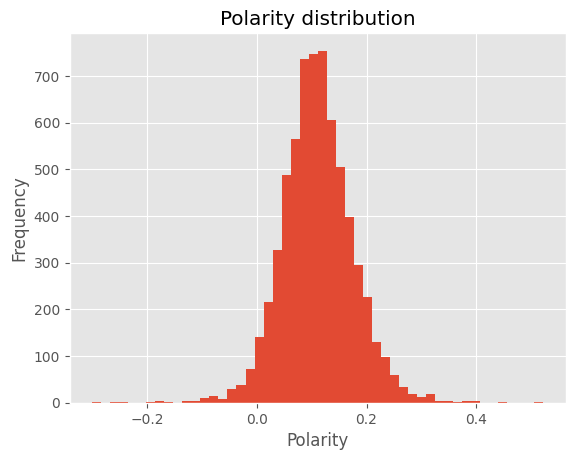

In [ ]:
#Creating a histogram for the polarity in the content column
plt.style.use('ggplot')
df_statistics['polarity: content'].plot(kind='hist', bins=50)
plt.xlabel('Polarity')
plt.title('Polarity distribution')

# Show the plot
plt.show()

### Analysis of 'esg_topics' column

In [ ]:
# calculating the length of words in column 'esg_topics'
df_statistics['length: esg_topics'] = df_no_stop_words['esg_topics'].astype(str).apply(len)
# calculating the token count in column 'esg_topics'
df_statistics['num tokens: esg_topics'] = df_no_stop_words['esg_topics'].apply(lambda x: len(str(x).split()))
# calculating polarity in column 'esg_topics'
df_statistics['polarity: esg_topics'] = df_no_stop_words['esg_topics'].map(lambda text: TextBlob(str(text)).sentiment.polarity)

In [ ]:
df_statistics.describe()

,length: content,num tokens: content,polarity: content,length: esg_topics,num tokens: esg_topics,polarity: esg_topics
count,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000
mean,5054.814685,480.619945,0.110496,88.010490,5.779720,0.005919
std,3298.791519,314.902724,0.064458,54.928569,3.569161,0.012739
min,113.000000,11.000000,-0.300000,2.000000,1.000000,0.000000
25%,2698.000000,255.000000,0.070486,47.000000,3.000000,0.000000
50%,4423.500000,421.000000,0.108141,78.000000,5.000000,0.000000
75%,6704.750000,638.000000,0.148802,117.000000,8.000000,0.000000
max,65564.000000,6550.000000,0.521769,746.000000,49.000000,0.033333


<Axes: >

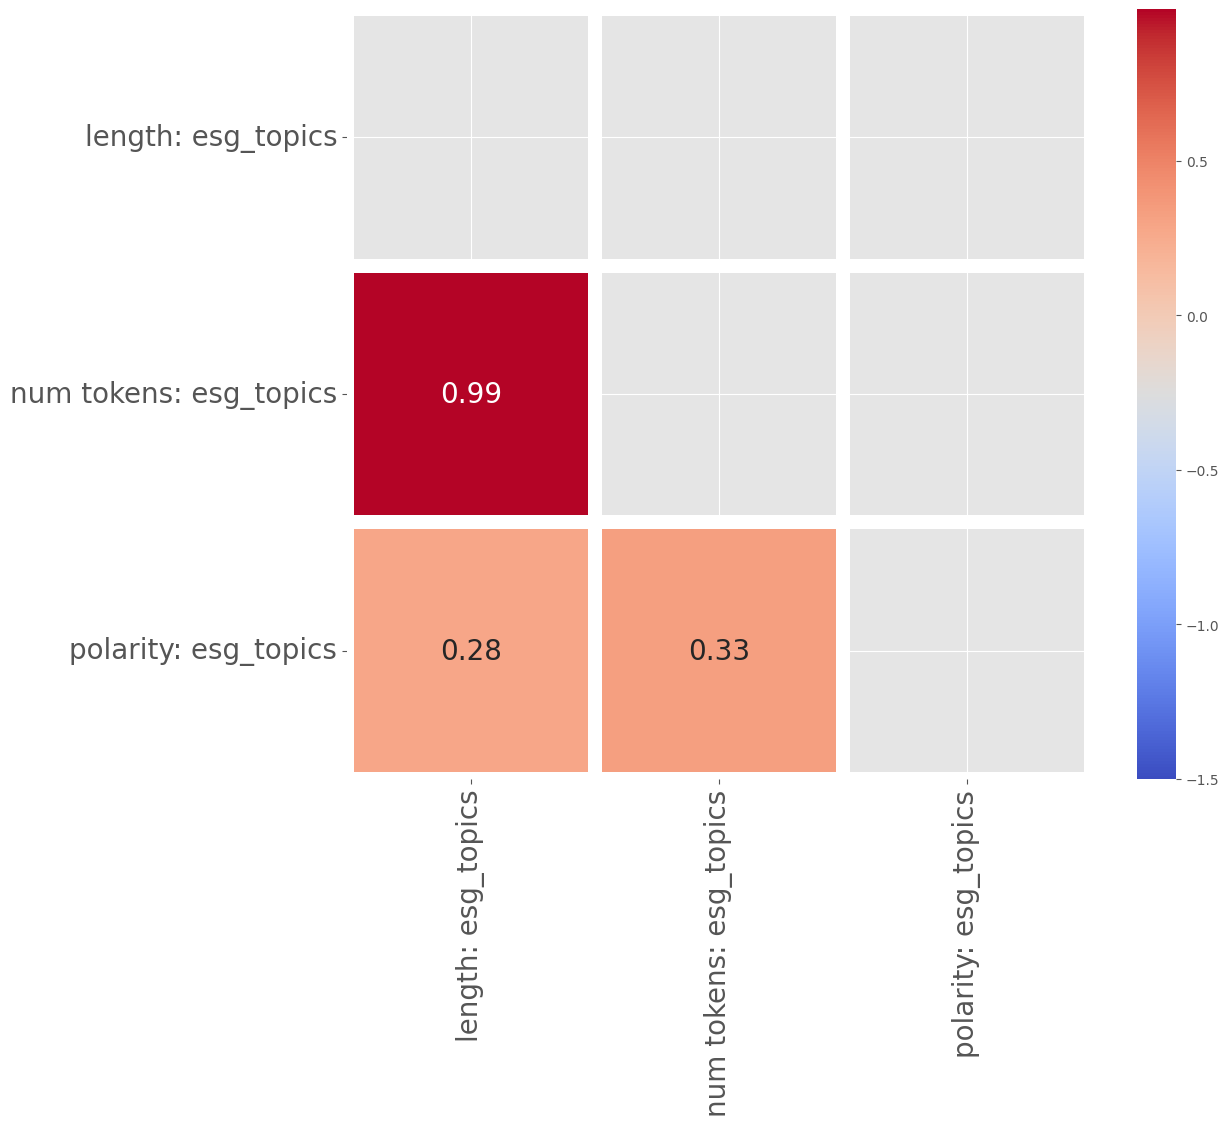

In [ ]:
# Correlation analysis between the statistics obtained from 'esg_topics'
correlation = df_statistics[['length: esg_topics','num tokens: esg_topics', 'polarity: esg_topics']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 20}, linewidths=10, vmin=-1.5, mask=mask)

The correlation matrix shows a higher correlation between the length of the words in the esg_topics and the number of tokens.

In [ ]:
# Retrieve the 20 most used words on 'esg_topics' without stopwords
nlp = spacy.load("en_core_web_sm")

def get_top_n_words(corpus, n=None):
    tokenized_corpus = [token.text for doc in nlp.pipe(corpus) for token in doc]
    counter = Counter(tokenized_corpus)
    words_freq = counter.most_common(n)
    return words_freq

corpus = [string for sublist in df_no_stop_words['esg_topics'] for string in sublist]

common_words = get_top_n_words(corpus, 20)

unigrams_w_stops = pd.DataFrame(common_words, columns=['word', 'count'])
print(unigrams_w_stops)

                       word  count
0           renewableenergy   2898
1                naturalgas   2772
2                 cleantech   2580
3           genderdiversity   1717
4                 emobility   1710
5                 lowcarbon   1679
6             energystorage   1565
7               solarenergy   1391
8             climatechange   1241
9               environment   1185
10              fossilfuels   1169
11                   social   1168
12               windenergy   1132
13              ghgemission   1063
14            carbondioxide    989
15           hydrogenenergy    753
16                     coal    639
17                pollution    635
18  carboncaptureandstorage    564
19                  privacy    551


Text(0.5, 1.0, 'Top most used words in esg_topics ')

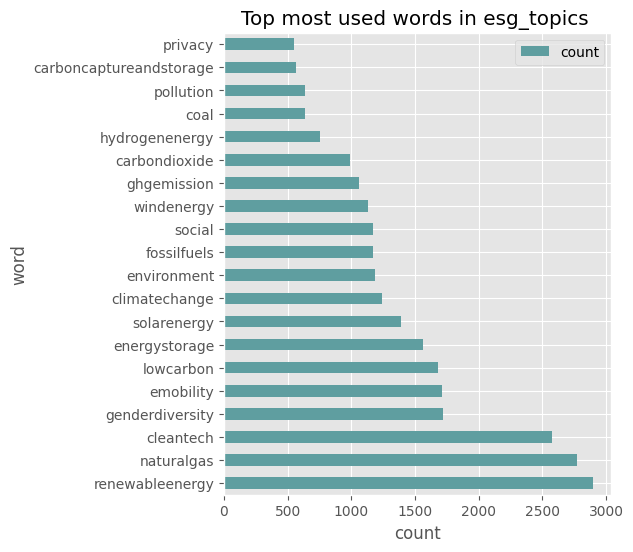

In [ ]:
unigrams_w_stops.plot(kind='barh', x='word', color='cadetblue', width=0.5, figsize=(5,6))
plt.xlabel('count')
plt.ylabel('word')
plt.title('Top most used words in esg_topics ')

We can see that 'renewable energy', 'natural gas' and 'cleanteach' are the most used words after removing stopwords within the esg_topics.

##Topic Modeling

In this last chapter, we will observe an LDA, NMF and BERTopic analysis narrowed to the column 'content' of the dataframe.

### LDA Analysis

In [ ]:
import gensim
import warnings
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize
import pandas as pd
import re
from bertopic import BERTopic




AttributeError: ignored

In [ ]:
df_no_stop_words.head()

,title,content,esg_topics
0,"[qatar, slash, emission, lng, expansion, advance]","[qatar, petroleum, qp, targeting, aggressive, ...","[solarenergy, ghgemission, methane, esgdisclos..."
1,"[india, launch, first, mw, phwr]","[nuclear, power, corp, india, ltd, npcil, sync...","[lowcarbon, nuclearpower, windenergy, renewabl..."
2,"[abu, dhabi, eye, h, lead]","[abu, dhabi, pushing, become, global, supplier...","[lowcarbon, renewableenergy, hydrogenenergy]"
3,"[new, chapter, uschina, energy, trade]","[new, u, president, joe, biden, took, office, ...","[sanction, climatechange, fossilfuels, petrole..."
4,"[japan, slow, restarts, cast, doubt, energy, p...","[slow, pace, japanese, reactor, restarts, cont...","[nuclearpower, counterterrorism]"


In [ ]:
# Create a list (corpus) containing all values flattened and create a gensim dictionary
corpus = df_no_stop_words.values.flatten().tolist()
dictionary = gensim.corpora.Dictionary(documents=corpus)
dictionary.filter_extremes(no_below=5, no_above=0.5)
dictionary

In [ ]:
corpus_bow = [dictionary.doc2bow(tokens) for tokens in corpus]

# Train an LDA model using the bag-of-words representation
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus_bow,
                                           id2word=dictionary,
                                           num_topics=10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=500,
                                           passes=20,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
lda_model.save('model10.gensim')

# Print the top 6 words for each topic in the model
topics = lda_model.print_topics(num_words=6)
print("\nTopics in NMF model:")
for topic in topics:
    print(topic)

(0, '0.019*"daily" + 0.017*"rig" + 0.016*"market" + 0.013*"wa" + 0.012*"year" + 0.011*"month"')
(1, '0.050*"solar" + 0.031*"energy" + 0.018*"state" + 0.013*"u" + 0.012*"new" + 0.010*"policy"')
(2, '0.016*"azocleantech" + 0.016*"plastic" + 0.013*"woman" + 0.013*"spoke" + 0.012*"development" + 0.011*"international"')
(3, '0.058*"gas" + 0.034*"natural" + 0.022*"price" + 0.021*"said" + 0.021*"dollar" + 0.018*"ngi"')
(4, '0.016*"wa" + 0.011*"ha" + 0.010*"one" + 0.010*"time" + 0.009*"year" + 0.009*"like"')
(5, '0.199*"privacy" + 0.079*"renewableenergy" + 0.060*"naturalgas" + 0.040*"energystorage" + 0.040*"cleantech" + 0.037*"solarenergy"')
(6, '0.035*"energy" + 0.024*"project" + 0.019*"wind" + 0.012*"industry" + 0.012*"medium" + 0.011*"group"')
(7, '0.021*"system" + 0.014*"battery" + 0.014*"energy" + 0.013*"technology" + 0.012*"solar" + 0.012*"power"')
(8, '0.030*"recharge" + 0.024*"electric" + 0.019*"vehicle" + 0.016*"ev" + 0.015*"tesla" + 0.013*"cleantechnica"')
(9, '0.051*"dn" + 0.050*"hy

###  NMF  Analysis

In [ ]:
# Extracting the 'content' column
articles = [' '.join(text) for text in df_no_stop_words['content']]


In [ ]:
# Obtain a Counts design matrix
vectorizer = CountVectorizer(analyzer='word', max_features=1000)
x_counts = vectorizer.fit_transform(articles)

In [ ]:
# Set a TfIdf transformer and transform the counts with the model
transformer = TfidfTransformer()
x_tfidf = transformer.fit_transform(x_counts)

In [ ]:
# Normalize the TfIdf values
xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

num_topics = 10  # Number of topics to extract
model = NMF(n_components=num_topics, init='nndsvd')
model.fit(xtfidf_norm)

NMF(init='nndsvd', n_components=10)

In [ ]:
## Get words from each topic
def get_nmf_topics(model, feature_names, n_top_words):
    word_dict = {}
    for i in range(num_topics):
        words_ids = model.components_[i].argsort()[:-n_top_words - 1:-1]
        words = [feature_names[key] for key in words_ids]
        words = [re.sub('\S*@\S*\s?', '', sent) for sent in words]
        words = [re.sub('\s+', ' ', sent) for sent in words]
        words = [re.sub("\'", "", sent) for sent in words]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words
    return pd.DataFrame(word_dict)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Get the top 20 words for each topic
get_nmf_topics(model, feature_names, 20)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,energy,azocleantech,rig,tesla,dn,solar,hydrogen,lng,wind,battery
1,oil,plastic,gas,cleantechnica,recharge,energy,green,cargo,offshore,storage
2,said,woman,ngi,vehicle,medium,power,fuel,offset,turbine,energy
3,uk,spoke,daily,electric,group,project,energy,gas,floating,system
4,ha,planet,natural,ev,privacy,community,ammonia,carbon,energy,power
5,carbon,interview,price,car,read,pv,steel,emission,gw,grid
6,climate,organization,email,sale,data,panel,cell,said,project,technology
7,plan,international,shale,model,publication,renewable,production,shell,scotland,ev
8,geothermal,development,news,charging,secure,mw,renewable,bp,farm,lithiumion
9,emission,day,data,plugin,responsible,industry,blue,project,scottish,charging


### Top2Vec Analysis

In [ ]:
from top2vec import Top2Vec

In [ ]:
def run_top2vec(dataframe, text_column, num_topics=5):

    # Extract text data from the specified column
    documents = dataframe[text_column].values.tolist()

    # Create a Top2Vec model
    model = Top2Vec(documents, speed='fast-learn', workers=4)

    # Fit the model
    model.fit()

    # Extract topics
    topics = model.get_topics(num_topics)

    return model, topics

# Run Top2Vec on the 'text' column
top2vec_model, extracted_topics = run_top2vec(df_no_stop_words, text_column='content', num_topics=5)

# Print the topics
for i, topic in enumerate(extracted_topics):
    words, word_scores = top2vec_model.get_topic(i)
    print(f"Topic {i + 1}:")
    for word, score in zip(words, word_scores):
        print(f"  {word}: {score}")
    print("\n")


### BERTopic Analysis


In [ ]:
#!pip install bertopic


In [ ]:
# Assuming 'content' is the column containing the text data
articles = [' '.join(text) for text in df_no_stop_words['content']]

# Initialize and fit BERTopic model
model = BERTopic(language="english")  # You can specify your language if it's different
topics, _ = model.fit_transform(articles)



.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
!pip install wordcloud


In [ ]:

# Get topics and their top words
top_words = model.get_topics(5)  # top 5 words to be retrieved for each topic

# Print topics and their top words
for topic_id, words in top_words.items():
    print(f"Topic {topic_id}:")
    print(words)


Topic Main:
{-1: [('energy', 0.006850384555220718), ('ha', 0.005482416867959659), ('solar', 0.0054301671578872905), ('company', 0.005208090947715625), ('project', 0.0050732682590156715), ('new', 0.0050017336867631025), ('technology', 0.00496007107716731), ('year', 0.004904125025172576), ('power', 0.004871407389451474), ('gas', 0.004642487494625953)], 0: [('woman', 0.026169168883070526), ('plastic', 0.025860215937128627), ('spoke', 0.025722253501316777), ('azocleantech', 0.023260573695572943), ('planet', 0.020779308771619348), ('interview', 0.019688232258213874), ('organization', 0.019296382688577477), ('international', 0.01855788886018525), ('development', 0.015874766784222148), ('day', 0.015829076839242874)], 1: [('solar', 0.03439836891239919), ('community', 0.02485945471010283), ('project', 0.018586677512505017), ('energy', 0.014649385983767728), ('mw', 0.012663541631167233), ('renewable', 0.011619927875106606), ('program', 0.01150978773814962), ('jersey', 0.01069148367757301), ('sta